In [93]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, silhouette_samples

In [94]:
# Read the dataset
data = pd.read_csv('sales_and_customer_insights.csv')
data.head(10)

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,952.81,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,5427.51,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,3994.80,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,4880.01,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,8557.70,2022-11-09,2023-10-28,Spring,Morning,Discount
5,CUST_63F5GB,PROD_L0NAD5,TRANS_HI4MBV,12,132.90,Electronics,42,Europe,0.25,8215.33,2020-12-26,2023-12-09,Winter,Evening,Loyalty Program
6,CUST_P9K9F2,PROD_CVVCB0,TRANS_X0MXCI,16,128.43,Clothing,38,Europe,0.94,7031.07,2022-03-15,2023-09-06,Summer,Afternoon,Email Campaign
7,CUST_EMHZQV,PROD_PVOV5L,TRANS_9B8B46,10,67.52,Electronics,56,Asia,0.56,5167.16,2021-02-17,2023-06-12,Summer,Afternoon,Discount
8,CUST_8E2Q1K,PROD_MG36BV,TRANS_AZ1OW8,7,165.26,Electronics,73,Europe,0.17,9943.51,2021-03-28,2023-02-05,Winter,Evening,Loyalty Program
9,CUST_4VB1T5,PROD_DKK6UZ,TRANS_AC3353,6,52.86,Home,60,North America,0.59,9978.11,2021-08-16,2023-10-06,Winter,Evening,Loyalty Program


In [95]:
# Display statistical summary of numerical columns in the dataset
data.describe()

,Purchase_Frequency,Average_Order_Value,Time_Between_Purchases,Churn_Probability,Lifetime_Value
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.955700,110.006022,46.885300,0.501552,5031.930567
std,5.526209,52.096870,24.711746,0.288289,2865.420299
min,1.000000,20.010000,5.000000,0.000000,100.160000
25%,5.000000,65.262500,25.000000,0.250000,2518.775000
50%,10.000000,109.930000,47.000000,0.500000,5012.180000
75%,15.000000,155.480000,68.000000,0.750000,7526.232500
max,19.000000,199.960000,89.000000,1.000000,9999.760000


In [115]:
from scipy.stats import skew, kurtosis

def check_skewness_and_kurtosis(data):
    """
    Calculates and prints the skewness and kurtosis of each numerical column in the dataset.
    """
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns  # Select only numerical columns
    for col in numerical_cols:
        col_skewness = skew(data[col].dropna())  # Calculate skewness
        col_kurtosis = kurtosis(data[col].dropna())  # Calculate kurtosis
        print(f"{col}:")
        print(f"  Skewness: {col_skewness:.2f}")
        print(f"  Kurtosis: {col_kurtosis:.2f}")
        print("-" * 30)

# Call the function
check_skewness_and_kurtosis(data)


Purchase_Frequency:
  Skewness: 0.01
  Kurtosis: -1.21
------------------------------
Average_Order_Value:
  Skewness: -0.00
  Kurtosis: -1.20
------------------------------
Time_Between_Purchases:
  Skewness: 0.01
  Kurtosis: -1.22
------------------------------
Churn_Probability:
  Skewness: 0.01
  Kurtosis: -1.20
------------------------------
Lifetime_Value:
  Skewness: 0.01
  Kurtosis: -1.21
------------------------------


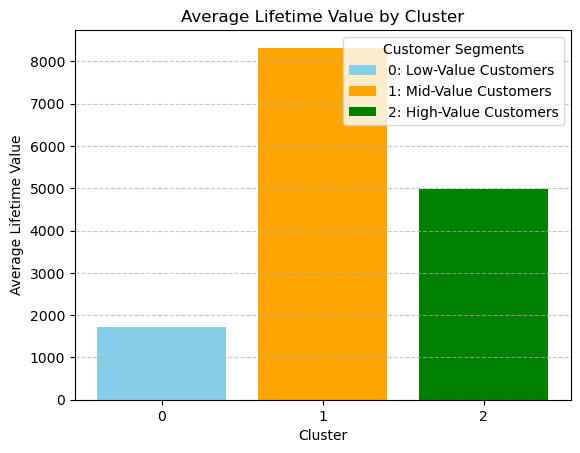

In [96]:
def plot_bar_chart(data):
    """
    Creates a bar chart showing the average Lifetime_Value for each cluster with a clear legend.
    """
    # Perform clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['Average_Order_Value', 'Lifetime_Value']])

    # Aggregate data for the bar chart
    cluster_summary = data.groupby('Cluster')['Lifetime_Value'].mean()

    # Create the bar chart
    colors = ['skyblue', 'orange', 'green']
    bars = plt.bar(cluster_summary.index, cluster_summary.values, color=colors)

    # Add labels and title
    plt.title('Average Lifetime Value by Cluster')
    plt.ylabel('Average Lifetime Value')
    plt.xlabel('Cluster')
    plt.xticks(ticks=cluster_summary.index, labels=['0', '1', '2'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a legend explicitly
    plt.legend(bars, ["0: Low-Value Customers","1: Mid-Value Customers","2: High-Value Customers"], title='Customer Segments', loc='upper right')
    plt.show()

plot_bar_chart(data)

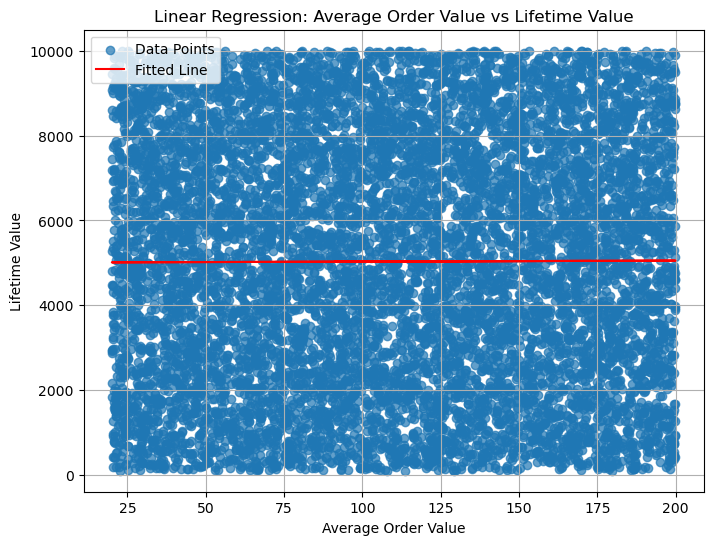

Coefficient: 0.2301183522540228
Intercept: 5006.616162479339


In [97]:
def plot_linear_regression(data):
    """
    Performs linear regression and plots the regression line with the data.
    """
    X = data[['Average_Order_Value']].values  # Independent variable
    y = data['Lifetime_Value'].values        # Dependent variable
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Scatter plot and regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, alpha=0.7, label='Data Points')
    plt.plot(X, model.predict(X), color='red', label='Fitted Line')
    plt.xlabel('Average Order Value')
    plt.ylabel('Lifetime Value')
    plt.title('Linear Regression: Average Order Value vs Lifetime Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print coefficients
    print("Coefficient:", model.coef_[0])
    print("Intercept:", model.intercept_)

# Call the function
plot_linear_regression(data)

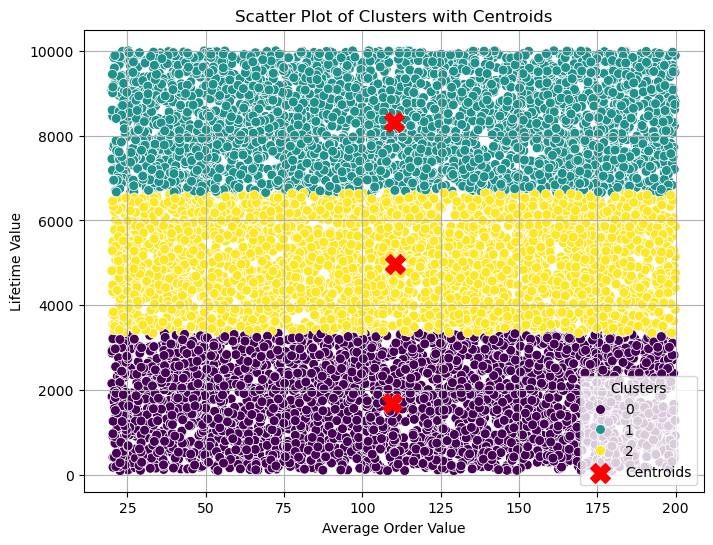

In [111]:
def plot_scatter_with_clusters_and_centroids(data):
    """
    Creates a scatter plot with clustering and includes centroids.
    """
    # Perform clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['Average_Order_Value', 'Lifetime_Value']])
    
    # Get centroids
    centroids = kmeans.cluster_centers_

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='Average_Order_Value', y='Lifetime_Value', hue='Cluster', palette='viridis', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids', marker='X')
    plt.title('Scatter Plot of Clusters with Centroids')
    plt.xlabel('Average Order Value')
    plt.ylabel('Lifetime Value')
    plt.legend(title='Clusters')
    plt.grid(True)
    plt.show()

plot_scatter_with_clusters_and_centroids(data)


<Figure size 1000x1000 with 0 Axes>

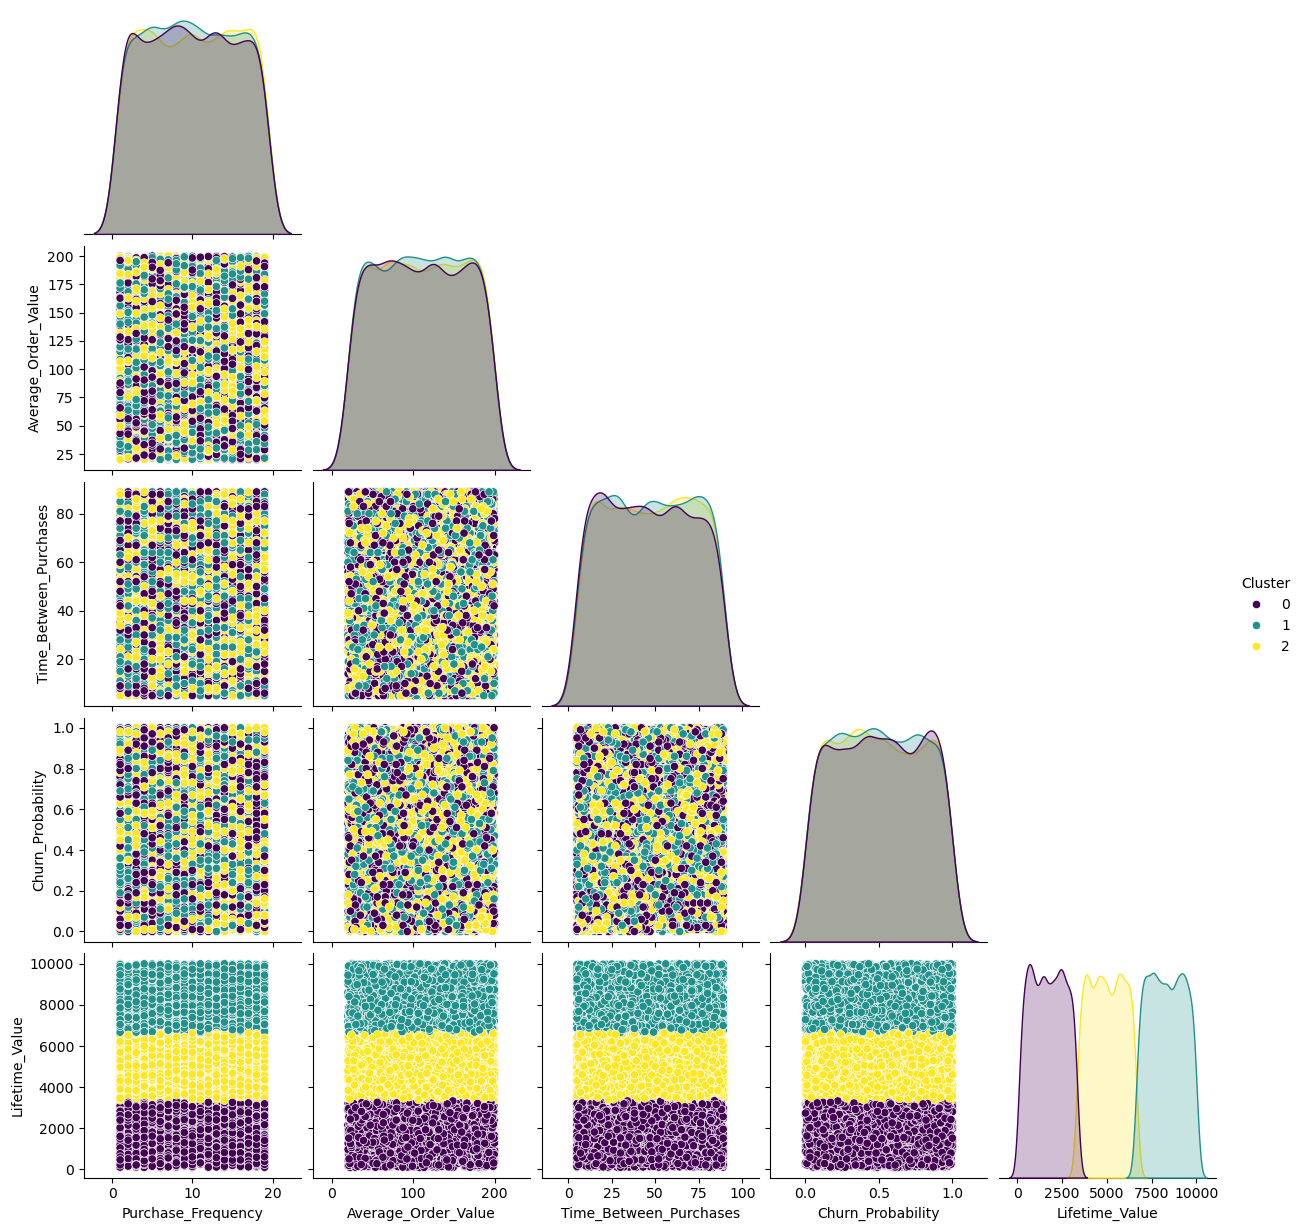

In [113]:
def plot_corner(data):
    plt.figure(figsize=(10, 10))
    sns.pairplot(data[['Purchase_Frequency', 'Average_Order_Value', 'Time_Between_Purchases', 'Churn_Probability', 'Lifetime_Value', 'Cluster']], hue='Cluster', palette='viridis', diag_kind='kde', corner=True)
    plt.show()
plot_corner(data)

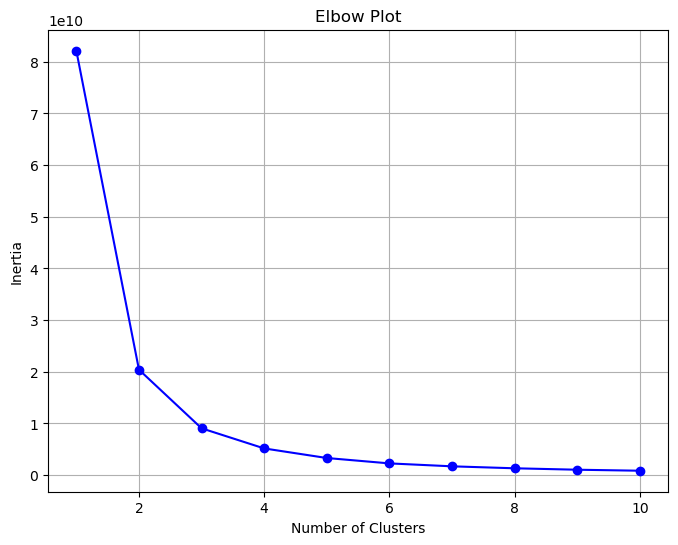

In [100]:
def plot_elbow(data):
    """
    Creates an elbow plot to determine the optimal number of clusters.
    """
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertias, marker='o', linestyle='-', color='blue')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Plot')
    plt.grid(True)
    plt.show()
plot_elbow(data[['Purchase_Frequency', 'Average_Order_Value', 'Time_Between_Purchases', 'Churn_Probability', 'Lifetime_Value']])